In [391]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [392]:
#loading data
df=pd.read_csv('payment_fraud.csv')

In [393]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


In [395]:
#handling null value
df.isnull().sum()


accountAgeDays            0
numItems                  0
localTime                 0
paymentMethod             0
paymentMethodAgeDays      0
Category                 95
isWeekend               560
label                     0
dtype: int64

In [396]:
'''#df.dropna(inplace=True)
df = df.dropna()
df = df.drop_duplicates()'''
df.fillna({'Category': df['Category'].mode()[0]}, inplace=True)

df.fillna({'isWeekend': df['isWeekend'].mode()[0]}, inplace=True)

In [397]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


In [398]:
df.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
Category                0
isWeekend               0
label                   0
dtype: int64

In [399]:
#since category and paymentmethod is object type and contain string we use one hot encoding to convert this data 
from sklearn.preprocessing import OneHotEncoder
encoder1=OneHotEncoder()
encoder2=OneHotEncoder()

In [400]:
encoded1=encoder1.fit_transform(df[['Category']]).toarray()
encoded2=encoder2.fit_transform(df[['paymentMethod']]).toarray()


In [401]:
encoded_df1 = pd.DataFrame(encoded1, columns=encoder1.get_feature_names_out(), index=df.index)
encoded_df2 = pd.DataFrame(encoded2, columns=encoder2.get_feature_names_out(), index=df.index)
df = pd.concat([df.drop('Category', axis=1), encoded_df1], axis=1)
df = pd.concat([df.drop('paymentMethod', axis=1), encoded_df2], axis=1)


In [402]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,Category_electronics,Category_food,Category_shopping,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit
0,29,1,4.745402,28.204861,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0
1,725,1,4.742303,0.000000,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0
2,845,1,4.921318,0.000000,1.0,0,0.0,1.0,0.0,1.0,0.0,0.0
3,503,1,4.886641,0.000000,1.0,0,1.0,0.0,0.0,1.0,0.0,0.0
4,2000,1,5.040929,0.000000,0.0,0,0.0,0.0,1.0,1.0,0.0,0.0


In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accountAgeDays             39221 non-null  int64  
 1   numItems                   39221 non-null  int64  
 2   localTime                  39221 non-null  float64
 3   paymentMethodAgeDays       39221 non-null  float64
 4   isWeekend                  39221 non-null  float64
 5   label                      39221 non-null  int64  
 6   Category_electronics       39221 non-null  float64
 7   Category_food              39221 non-null  float64
 8   Category_shopping          39221 non-null  float64
 9   paymentMethod_creditcard   39221 non-null  float64
 10  paymentMethod_paypal       39221 non-null  float64
 11  paymentMethod_storecredit  39221 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 3.6 MB


In [404]:
print(df['label'].value_counts())

label
0    38661
1      560
Name: count, dtype: int64


In [405]:
# observation : data is imbalance so , using upsampling for making data balance 
df_minority=df[df['label']==1]
df_majority=df[df['label']==0]

from sklearn.utils import resample 
# it is use to create new data point for up sampling
df_minority_resample=resample(df_minority,replace=True,n_samples=len(df_majority))

df_upsampled=pd.concat([df_minority_resample,df_majority])


In [406]:
df_upsampled.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,Category_electronics,Category_food,Category_shopping,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit
23826,1,1,4.836982,0.040278,0.0,1,1.0,0.0,0.0,1.0,0.0,0.0
24822,1,1,3.483951,0.000000,0.0,1,1.0,0.0,0.0,0.0,1.0,0.0
24816,1,1,4.895263,0.000000,0.0,1,1.0,0.0,0.0,1.0,0.0,0.0
28781,1,1,4.505662,0.000000,0.0,1,0.0,1.0,0.0,1.0,0.0,0.0
9618,1,1,3.954522,0.001389,0.0,1,1.0,0.0,0.0,0.0,1.0,0.0


In [407]:
df_upsampled['label'].value_counts()

label
1    38661
0    38661
Name: count, dtype: int64

Text(0.5, 1.0, 'Correlation matrix')

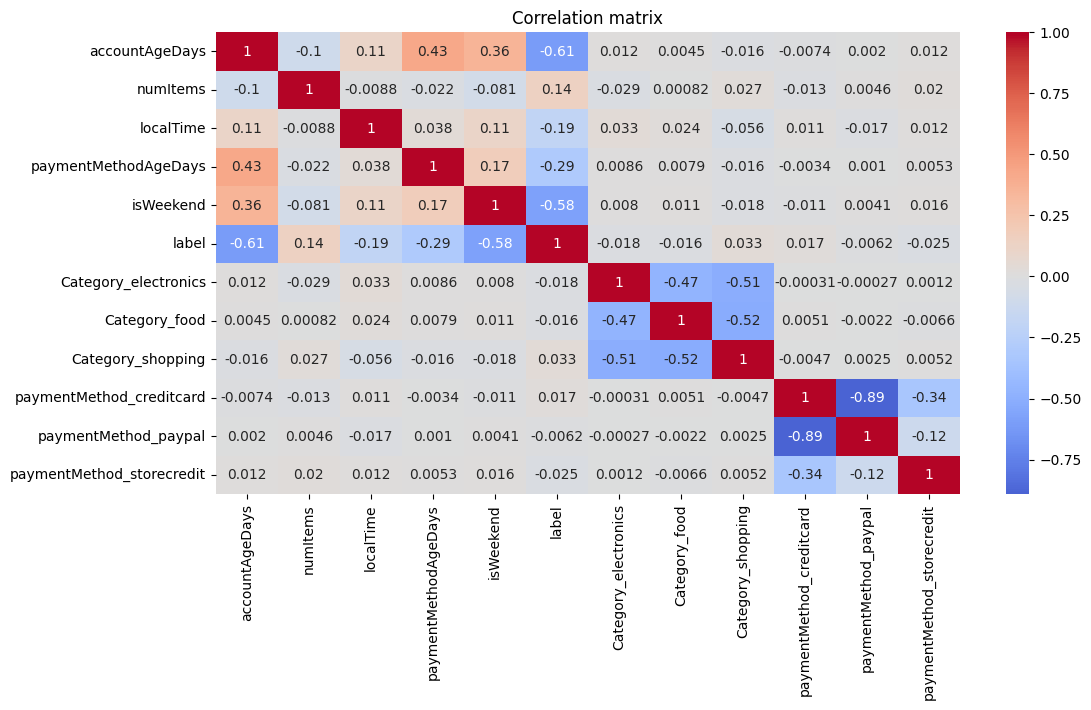

In [408]:
#correlation matrix 
plt.figure(figsize=(12,6))
sns.heatmap(df_upsampled.corr(),
           annot=True,
           center=0,
           cmap='coolwarm')
plt.title("Correlation matrix")

In [409]:
#dependent and independent variable
X=df_upsampled.drop('label',axis=1)
y=df_upsampled['label']

In [410]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [411]:
from sklearn.model_selection import train_test_split


In [412]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [413]:
#doing logistic regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [414]:
# preformance metric
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("accuracy",accuracy_score(y_pred,y_test))
print("confusion_matrix",confusion_matrix(y_pred,y_test))
print("classification_report",classification_report(y_test,y_pred))

accuracy 0.9583053127101546
confusion_matrix [[8826    0]
 [ 806 9699]]
classification_report               precision    recall  f1-score   support

           0       1.00      0.92      0.96      9632
           1       0.92      1.00      0.96      9699

    accuracy                           0.96     19331
   macro avg       0.96      0.96      0.96     19331
weighted avg       0.96      0.96      0.96     19331



In [415]:
#hyper parameter tuning
penalty=['l1','l2','elasticney']
c_value=[100,10,0.1,0.01,1]
solver=['newton-cg','saga','sag','liblinear','lbfgs']
params=dict(penalty=penalty,C=c_value,solver=solver)